# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
def get_current_weather(city, api_key):
    url = "http://api.openweathermap.org/data/2.5/weather"
    payload = {
        "appid": api_key,
        "q": city
    }
    r = requests.get(url, params = payload)
    
    if r.status_code == 200:
        print(f"Processing Record {len(all_cities)}| {city}")
        return r.json()
    else:
        print("City not found. Skipping...")
        return None

In [5]:
all_cities = []
print('''
Beginning Data Retrieval
--------------------------------''')
for city in cities:
    result = get_current_weather(city, api_key)
    if result:
        all_cities.append(result)


Beginning Data Retrieval
--------------------------------
Processing Record 0| ushuaia
Processing Record 1| harwich
Processing Record 2| kodinsk
Processing Record 3| tasiilaq
Processing Record 4| pacific grove
Processing Record 5| tuktoyaktuk
Processing Record 6| ayr
City not found. Skipping...
Processing Record 7| nome
Processing Record 8| arraial do cabo
Processing Record 9| jamestown
Processing Record 10| hithadhoo
Processing Record 11| faanui
Processing Record 12| puerto ayora
Processing Record 13| mataura
Processing Record 14| isla mujeres
Processing Record 15| bambous virieux
Processing Record 16| portmore
Processing Record 17| bluff
Processing Record 18| ngunguru
Processing Record 19| gat
Processing Record 20| morgan city
Processing Record 21| nikolskoye
City not found. Skipping...
Processing Record 22| ostersund
Processing Record 23| hasaki
Processing Record 24| golspie
Processing Record 25| san-pedro
Processing Record 26| kavieng
City not found. Skipping...
Processing Record 

In [6]:
all_cities[0]

{'coord': {'lon': -68.31, 'lat': -54.81},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 283.15,
  'feels_like': 279.45,
  'temp_min': 283.15,
  'temp_max': 283.15,
  'pressure': 980,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 4.6, 'deg': 140},
 'clouds': {'all': 90},
 'dt': 1578442638,
 'sys': {'type': 1,
  'id': 8303,
  'country': 'AR',
  'sunrise': 1578384488,
  'sunset': 1578445805},
 'timezone': -10800,
 'id': 3833367,
 'name': 'Ushuaia',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df = pd.DataFrame([{
    "City": d["name"],
    "Country": d["sys"].get('country', ''),
    "Date": d["dt"],
    "Latitude": d["coord"].get('lat', ''),
    "Longitude": d["coord"].get('lon', ''),
    "Temp": d["main"]["temp"] - 273.15,
    "Temp Min": d["main"]["temp_min"],
    "Temp Max": d["main"]["temp_max"],
    "Pressure": d["main"]["pressure"],
    "Humidity": d["main"]["humidity"],
    "Clouds": d["clouds"].get("all", ""),
    "Wind Speed": d["wind"].get("speed", "")
} for d in all_cities])

In [8]:
df['Max F'] = (df["Temp Max"] - 273.15) * (9/5) + 32
df['Wind Speed'] = df["Wind Speed"] * 2.237

In [9]:
df.to_csv('all_cities.csv')

In [10]:
df.head()

,City,Country,Date,Latitude,Longitude,Temp,Temp Min,Temp Max,Pressure,Humidity,Clouds,Wind Speed,Max F
0,Ushuaia,AR,1578442638,-54.81,-68.31,10.00,283.15,283.15,980,87,90,10.29020,50.000
1,Harwich,US,1578442638,41.69,-70.08,2.54,274.15,277.15,1015,60,40,5.81620,39.200
2,Kodinsk,RU,1578442638,58.60,99.18,-13.46,259.69,259.69,1026,97,94,3.80290,7.772
3,Tasiilaq,GL,1578442638,65.61,-37.64,-13.60,259.55,259.55,968,45,100,28.07435,7.520
4,Pacific Grove,US,1578442638,36.62,-121.92,13.03,283.71,288.71,1021,71,40,8.05320,60.008


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

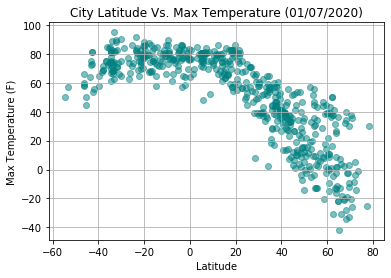

In [11]:
plt.scatter(df["Latitude"], df["Max F"], c = "teal", alpha = 0.5, marker = 'o')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f'City Latitude Vs. Max Temperature ({time.strftime("%m/%d/%Y")})')
plt.grid()
plt.savefig("latitude_vs_maxtemp.png")

plt.show()

#### Latitude vs. Humidity Plot

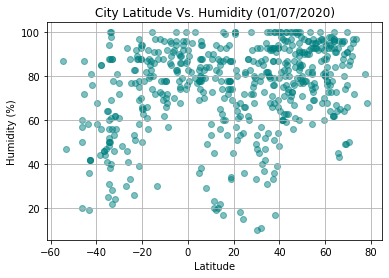

In [12]:
plt.scatter(df["Latitude"], df["Humidity"], c = 'teal', alpha = 0.5, marker = 'o')
plt.title(f'City Latitude Vs. Humidity ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("latitude_vs_humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

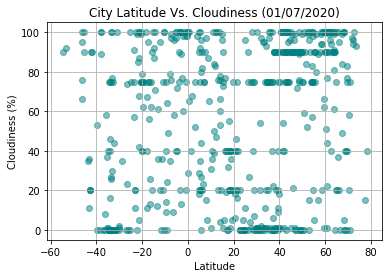

In [13]:
plt.scatter(df["Latitude"], df["Clouds"], c = 'teal', alpha = 0.5, marker = 'o')
plt.title(f'City Latitude Vs. Cloudiness ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("latitude_vs_cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

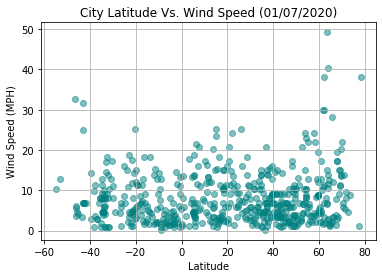

In [14]:
plt.scatter(df["Latitude"], df["Wind Speed"], c = 'teal', alpha = 0.5, marker = 'o')
plt.title(f'City Latitude Vs. Wind Speed ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()
plt.savefig("latitude_vs_windspeed.png")

plt.show()